In [2]:
import numpy as np
import matplotlib
import pandas as pd


dataset = pd.read_csv('/Users/wzhang/Downloads/lake_erie_habs_W4_6_8_9_12_13_16_2013-2020.xlsx - HAB_data (1).csv')

train = dataset.iloc[:743,:]
test = dataset.iloc[743:,:]
print(train)
print(test)
X_train = pd.DataFrame(train.iloc[:,4:15].values)
Y_train = train.iloc[:,16:].values
print(X_train.shape)
print(Y_train.shape)
X_test = pd.DataFrame(test.iloc[:,4:15].values)
Y_test = test.iloc[:,16:].values
print(X_test.shape)
print(Y_test.shape)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

          Date  Site  Latitude (decimal deg)  Longitude (decimal deg)  \
0    5/29/2013   WE6                 41.7134                 -83.3804   
1    5/29/2013   WE8                 41.8343                 -83.3633   
2    5/29/2013   WE4                 41.8267                 -83.1930   
3    6/10/2013   WE6                 41.7144                 -83.3805   
4    6/10/2013   WE8                 41.8353                 -83.3631   
..         ...   ...                     ...                      ...   
738  10/7/2019  WE16                 41.6599                 -83.1467   
739  10/7/2019  WE13                 41.7428                 -83.1354   
740  10/7/2019  WE12                 41.7023                 -83.2639   
741  10/7/2019   WE4                 41.8270                 -83.1949   
742  6/16/2020   WE6                 41.7054                 -83.3864   

     Secchi Depth (m)  CTD Temperature (°C)  \
0                1.60                  18.5   
1                1.00        

In [3]:
features = pd.DataFrame(dataset.iloc[:,4:15])
features = features.columns
print(features)

Index(['Secchi Depth (m)', 'CTD Temperature (°C)',
       'CTD Specific Conductivity (µS/cm)', 'CTD Dissolved Oxygen (mg/L)',
       'Turbidity (NTU)', 'Total Phosphorus (µg P/L)',
       'Total Dissolved Phosphorus (µg P/L)', 'Ammonia (µg N/L)',
       'Nitrate + Nitrite (mg N/L)', 'Particulate Organic Carbon (mg/L)',
       'Particulate Organic Nitrogen (mg/L)'],
      dtype='object')


In [4]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

2024-07-05 13:41:46.026312: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Initialize KNN regressor
knn = KNeighborsRegressor(n_neighbors=30)
# Train the model
knn.fit(X_train, Y_train)




KNeighborsRegressor(n_neighbors=30)

In [6]:
res = knn.predict(X_test)
print(res)
print(Y_test)

[[41.90533333]
 [51.20666667]
 [17.232     ]
 [35.47      ]
 [29.96933333]
 [48.02733333]
 [21.722     ]
 [16.581     ]
 [ 9.98933333]
 [58.36766667]
 [ 5.43766667]
 [54.79233333]
 [15.405     ]
 [43.516     ]
 [16.92666667]
 [41.81933333]
 [ 7.66366667]
 [62.53466667]
 [16.008     ]
 [33.34833333]
 [ 9.39366667]
 [57.04133333]
 [ 9.524     ]
 [12.16933333]
 [15.11633333]
 [11.94933333]
 [68.824     ]
 [21.741     ]
 [61.58766667]
 [17.19      ]
 [15.90233333]
 [48.17866667]
 [10.93566667]
 [47.54433333]
 [31.39833333]
 [55.67033333]
 [14.73633333]
 [15.91333333]
 [37.22233333]
 [11.03633333]
 [50.861     ]
 [27.93466667]
 [65.31266667]
 [32.05566667]
 [24.883     ]
 [25.19      ]
 [13.57933333]
 [47.369     ]
 [25.19433333]
 [60.091     ]
 [23.989     ]
 [16.58533333]
 [19.921     ]
 [11.62066667]
 [55.96333333]
 [33.46833333]
 [59.69133333]
 [17.742     ]
 [13.80433333]
 [31.95466667]
 [15.04966667]
 [57.32766667]
 [30.54      ]
 [52.12666667]
 [27.45233333]
 [14.625     ]
 [29.54   

In [7]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, res)
print(r2)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test,res)
print(mae)
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y_test,res)
print(mape)
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(Y_test,res)
print(rmse)


0.6044223936134949
8.847559027777777
0.907202329707247
11.512516043992923


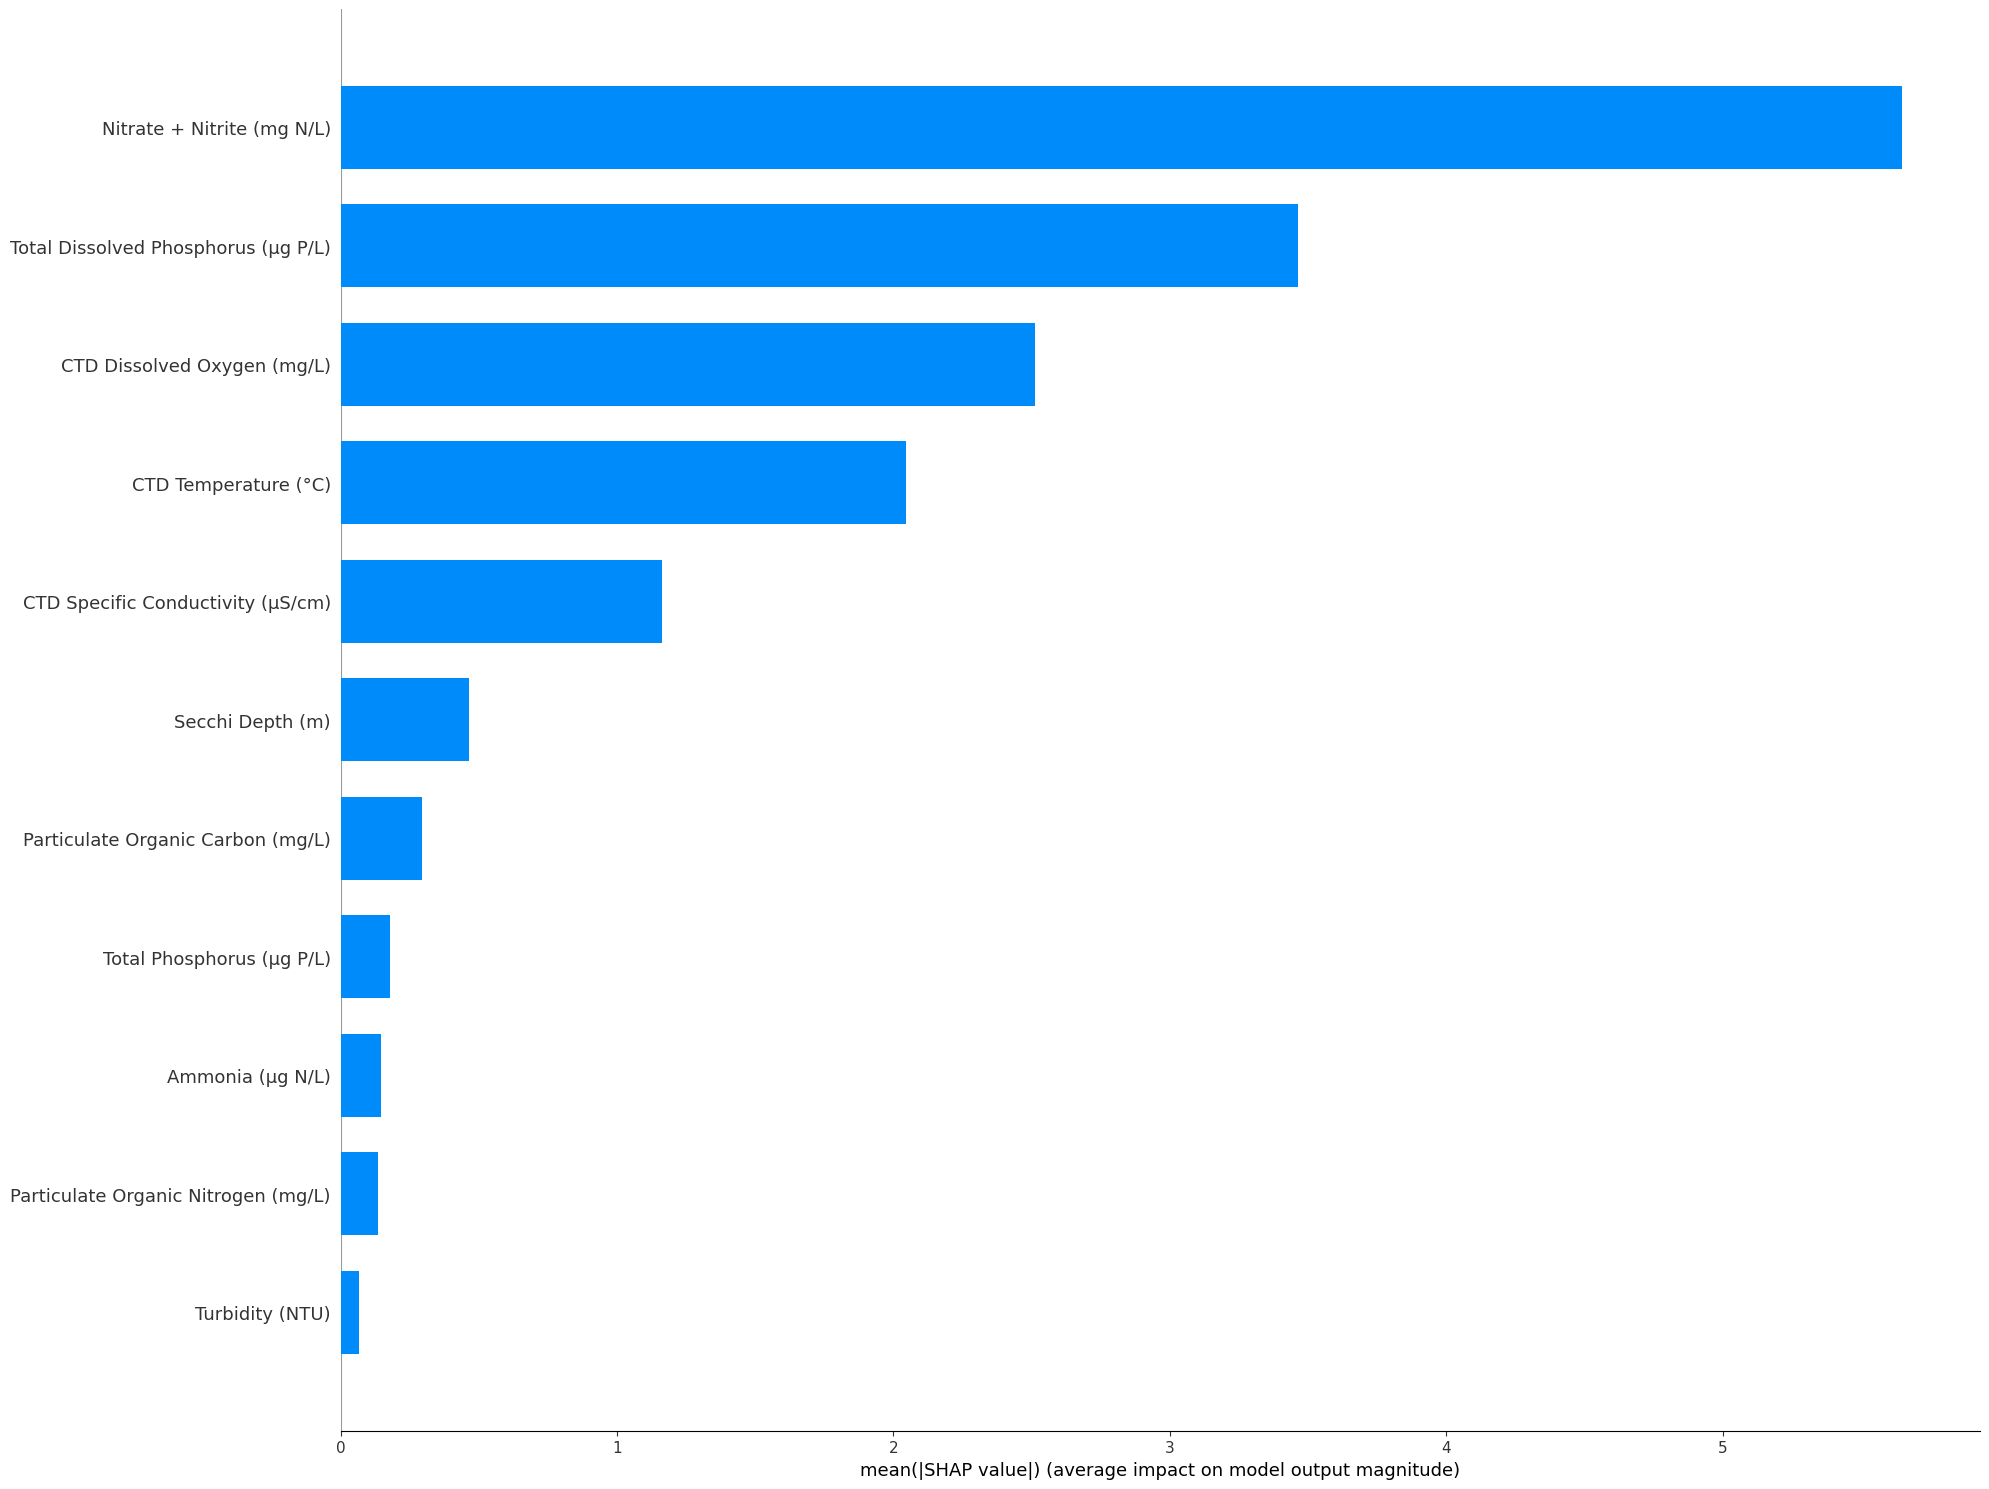

In [9]:
import shap
X_test_shap = shap.sample(X_train,nsamples = 2)
explainer = shap.Explainer(knn.predict,X_test_shap)
shap_values = explainer.shap_values(X_test_shap)
import matplotlib.pyplot as plt 
shap.summary_plot(shap_values, X_test_shap,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)
